In [121]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color

In [80]:
# Subir base de Datos
df = pd.read_csv('cuentas.csv', encoding='latin')

df.head(5)

<ipython-input-80-307cebdb785c>:2: DtypeWarning: Columns (26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas.csv', encoding='latin')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,agente_venta,dis_venta,status,fraude,empresa,inversion,pagos_realizados,reautorizacion,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81,1169.0,2106,0.0,Sintia Verenice Tenorio Perez E,mic0437,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,26.0,NaN
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225,1949.0,2925,0.0,Alvaro Rafael Pascual,mic015,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Sintia Verenice Tenorio Perez E,mic0437,3,0,microtec,0,0,0,NaN,NaN,NaN,NaN,Cancelado,0.0,0.0,0.0,0,0.0,NaN,NaN,74,NaN,NaN
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,1469.0,2210,0.0,Luz Aylin Hernandez Lopez1,mic0748,2,0,microtec,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0,NaN,NaN,13.0,NaN
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178,3224.0,6942,0.0,Sintia Verenice Tenorio Perez E,mic0437,1,0,microtec,0,0,0,05/03/2022 00:00,12/03/2022 00:00,Mora,0.0,0,0.0,0.0,0.0,NaN,NaN,74,NaN,NaN,NaN,NaN


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  int64  
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  float64
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

**Limpiar columnas**

In [116]:
# Eliminar el signo "S" de una columna "Plazo"
df['plazo'] = df['plazo'].str.replace('S', '')
df['plazo'] = df['plazo'].astype(int)

# Sustituirlos strings Atraso, Cancelado y Fraude por la constante "0"
df['riesgo']=df['riesgo'].str.replace('Atraso', '0')
df['riesgo']=df['riesgo'].str.replace('Cancelado', '0')
df['riesgo']=df['riesgo'].str.replace('Fraude', '0')

#Conversión de tipo de dato de columna de tipo Object a int
df['costo_total']= df['costo_total'].astype(float)

#Sustituyo valores nulos por el numero "0"
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
df["porc_enganche"]= df["porc_enganche"].fillna(0)

**Sacar Gráficas**

<Axes: xlabel='enganche', ylabel='riesgo'>

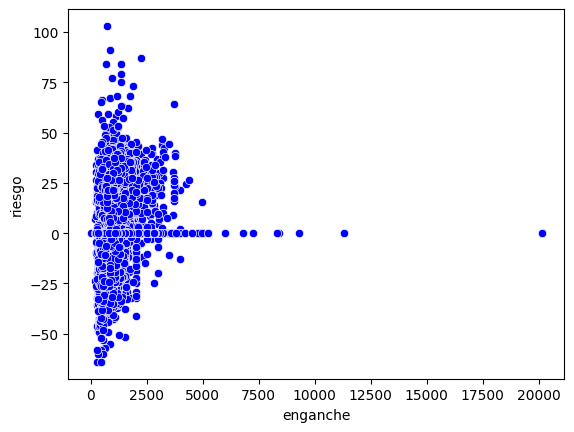

In [123]:
sns.scatterplot(x='enganche', y='riesgo', color="blue", data=df)

<Axes: xlabel='precio', ylabel='plazo'>

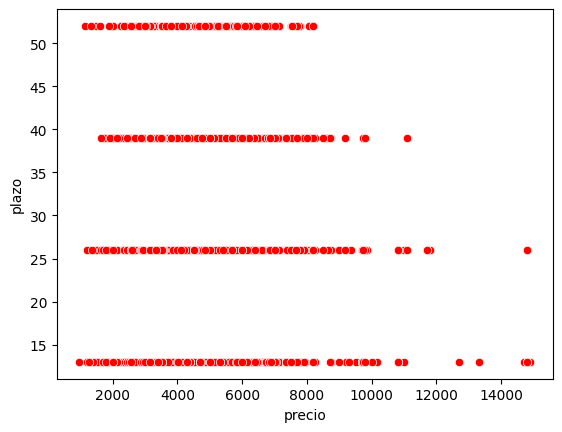

In [124]:
sns.scatterplot(x='precio', y='plazo', color="red", data=df)

<Axes: xlabel='costo_total', ylabel='monto_financiado'>

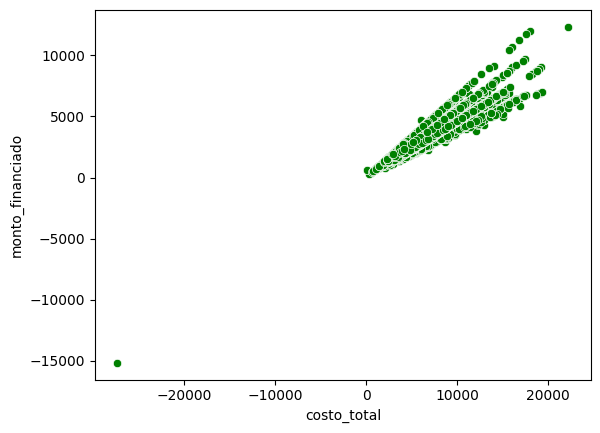

In [125]:
sns.scatterplot(x='costo_total', y='monto_financiado', color="green", data=df)

<Axes: xlabel='pagos_realizados', ylabel='porc_enganche'>

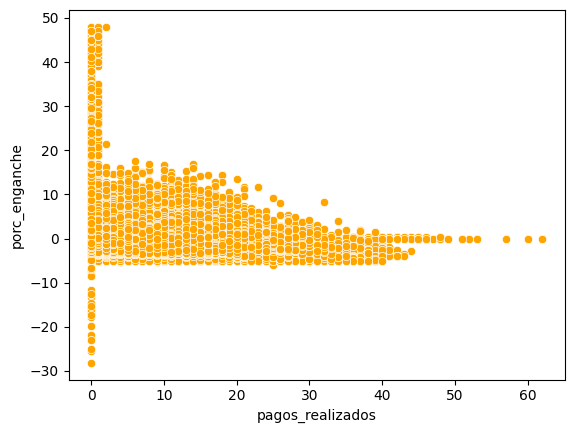

In [126]:
sns.scatterplot(x='pagos_realizados', y='porc_enganche', color="orange", data=df)

In [149]:
z# Definir modelo de regresion lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Y declarar variables dependientes e independientes para la regresión lineal

Modelo 1

In [153]:
# Modelo Matematico 1
Vars_Indep1= df[["enganche"]]
Var_Dep1= df["riesgo"]
model.fit(X=Vars_Indep1, y=Var_Dep1)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['enganche'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00601946]),
 'rank_': 1,
 'singular_': array([71873.82651082]),
 'intercept_': -3.422566722440304}

In [155]:
# Coeficiente Determinacion 1
coef_Deter1 = model.score(X = Vars_Indep1, y = Var_Dep1)
coef_Deter1

0.042564202425108943

In [156]:
# Coeficiente Correlacion 1
coef_Correl1 = np.sqrt(coef_Deter1)
coef_Correl1

0.20631093627122374

Modelo 2

In [158]:
# Modelo Matematico 2
Vars_Indep2= df[["precio"]]
Var_Dep2= df["plazo"]
model.fit(X=Vars_Indep2, y=Var_Dep2)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['precio'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00150129]),
 'rank_': 1,
 'singular_': array([205285.3032759]),
 'intercept_': 19.90894959705299}

In [159]:
# Coeficiente Determinacion 2
coef_Deter2 = model.score(X = Vars_Indep2, y = Var_Dep2)
coef_Deter2

0.041877006763330726

In [160]:
# Coeficiente Correlacion 1
coef_Correl2 = np.sqrt(coef_Deter2)
coef_Correl2

0.20463872254128915

Modelo 3

In [161]:
# Modelo Matematico 3
Vars_Indep3= df[["costo_total"]]
Var_Dep3= df["monto_financiado"]
model.fit(X=Vars_Indep3, y=Var_Dep3)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['costo_total'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.42741682]),
 'rank_': 1,
 'singular_': array([359751.03527969]),
 'intercept_': 639.9922581004103}

In [162]:
# Coeficiente Determinacion 3
coef_Deter3 = model.score(X = Vars_Indep3, y = Var_Dep3)
coef_Deter3

0.8646380417764322

In [163]:
# Coeficiente Correlacion 3
coef_Correl3 = np.sqrt(coef_Deter3)
coef_Correl3

0.929859151579653

Modelo 4

In [166]:
# Modelo 4
Vars_Indep4= df[["pagos_realizados"]]
Var_Dep4= df["porc_enganche"]
model.fit(X=Vars_Indep4, y=Var_Dep4)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['pagos_realizados'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.15132576]),
 'rank_': 1,
 'singular_': array([1463.82068582]),
 'intercept_': 2.3432248342563584}

In [167]:
# Coeficiente Determinacion 4
coef_Deter4 = model.score(X = Vars_Indep4, y = Var_Dep4)
coef_Deter4

0.06523723314088559

In [168]:
# Coeficiente Correlacion 4
coef_Correl4 = np.sqrt(coef_Deter4)
coef_Correl4

0.25541580440702094

- - -
**Los modelos son los siguientes:**

---
             
*Modelo Matemático 1:* 0.00601946x - 3.422566722440304

*Modelo Determinación 1:* 0.042564202425108943

*Modelo Correlación 1:* 0.20631093627122374

---

Modelo Matemático 2: 0.00150129x + 19.90894959705299

*Modelo Determinación 2:* 0.041877006763330726

*Modelo Correlación 2:* 0.20463872254128915

---

Modelo Matemático 3: 0.42741682x + 639.9922581004103

*Modelo Determinación 3:* 0.8646380417764322

*Modelo Correlación 3:* 0.929859151579653

---

*Modelo Matemático 4:* -0.15132576x + 2.3432248342563584

*Modelo Determinación 4:* 0.06523723314088559

*Modelo Correlación 4:* 0.25541580440702094

---